## Creating a baseline model using the cleaned data (before advanced feature engineering)

In [2]:
# Import the necessary packages
import os

# For calculating
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#for modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
X_train = pd.read_csv("../data/X_train.csv", dtype={'continent_dep': 'string', 'continent_arr': 'string'}, na_values=[''])
y_train = pd.read_csv("../data/y_train.csv")
X_test = pd.read_csv("../data/X_test.csv", dtype={'continent_dep': 'string', 'continent_arr': 'string'}, na_values=[''])
y_test = pd.read_csv("../data/y_test.csv")

In [4]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")


X_train shape: (74943, 137)
X_test shape: (18736, 137)


In [13]:
X_train.head(20)

,is_same_country,airline_5M,airline_6P,airline_BJ,airline_D4,airline_GJ,airline_GW,airline_OL,airline_PS,airline_QS,...,iso_country_arr_SE,iso_country_arr_SI,iso_country_arr_SK,iso_country_arr_SN,iso_country_arr_TG,iso_country_arr_TN,iso_country_arr_TR,iso_country_arr_UA,type_arr_medium_airport,type_arr_small_airport
0,0.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,0.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
2,0.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,0.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
4,0.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
5,0.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
6,1.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
7,0.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,0.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
9,0.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [5]:
print("Remaining Features in X_train:")
print(X_train.columns)

Remaining Features in X_train:
Index(['is_same_country', 'airline_5M', 'airline_6P', 'airline_BJ',
       'airline_D4', 'airline_GJ', 'airline_GW', 'airline_OL', 'airline_PS',
       'airline_QS',
       ...
       'iso_country_arr_SE', 'iso_country_arr_SI', 'iso_country_arr_SK',
       'iso_country_arr_SN', 'iso_country_arr_TG', 'iso_country_arr_TN',
       'iso_country_arr_TR', 'iso_country_arr_UA', 'type_arr_medium_airport',
       'type_arr_small_airport'],
      dtype='object', length=137)


In [6]:
# Initialize Linear Regression model
baseline_model = LinearRegression()

# Train the model
baseline_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = baseline_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print results
print(f"Model Performance on Test Set:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Model Performance on Test Set:
Mean Absolute Error (MAE): 151971083.12
Root Mean Squared Error (RMSE): 14936703842.84


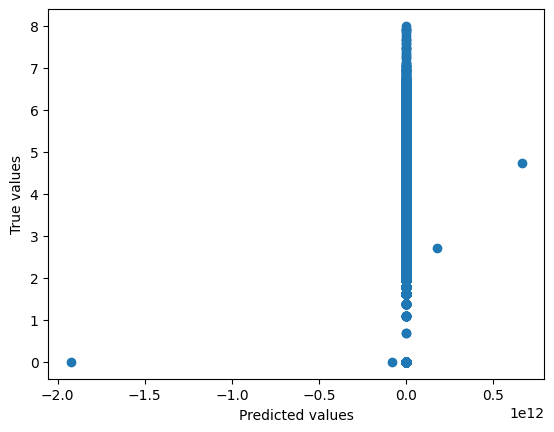

In [7]:
plt.scatter(y_pred, y_test) 
plt.ylabel("True values")
plt.xlabel("Predicted values")
plt.show()

(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.8733e+04, 1.0000e+00, 1.0000e+00]),
 array([-1.92450888e+12, -1.66589868e+12, -1.40728848e+12, -1.14867828e+12,
        -8.90068081e+11, -6.31457883e+11, -3.72847684e+11, -1.14237486e+11,
         1.44372713e+11,  4.02982912e+11,  6.61593110e+11]),
 <BarContainer object of 10 artists>)

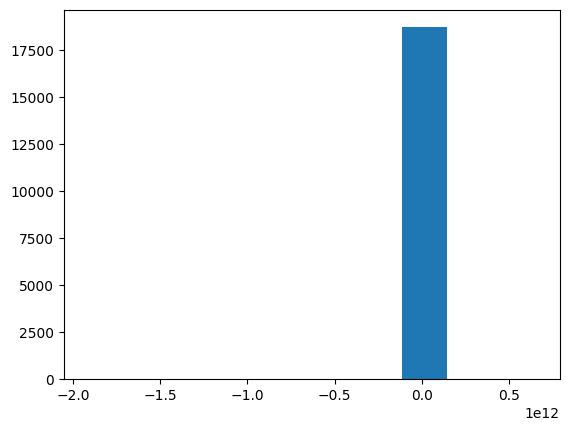

In [11]:
plt.hist(y_pred)

In [10]:
rows_with_all_false_or_zero = X_train[ (X_train == False)].all(axis=1) # Filter the rows 
result = X_train[rows_with_all_false_or_zero]
result 

,is_same_country,airline_5M,airline_6P,airline_BJ,airline_D4,airline_GJ,airline_GW,airline_OL,airline_PS,airline_QS,...,iso_country_arr_SE,iso_country_arr_SI,iso_country_arr_SK,iso_country_arr_SN,iso_country_arr_TG,iso_country_arr_TN,iso_country_arr_TR,iso_country_arr_UA,type_arr_medium_airport,type_arr_small_airport


In [27]:
coefficients = np.array(baseline_model.coef_) 
coefficients_transp  = coefficients.reshape(-1, 1)
coefficients_df = pd.DataFrame(coefficients_transp, index=np.array(X_train.columns), columns=['Coefficient'])
coefficients_df.sort_values( by= 'Coefficient', ascending = False)

,Coefficient
iso_country_arr_SE,1.884180e+12
iso_country_arr_DK,1.884180e+12
iso_country_arr_LU,1.884180e+12
iso_country_arr_NL,1.884180e+12
iso_country_arr_RS,1.884180e+12
...,...
iso_country_dep_LU,-6.038669e+11
iso_country_dep_EE,-6.038669e+11
iso_country_dep_QA,-6.038669e+11
continent_arr_AS,-1.884180e+12


In [19]:
coefficients

array([[-4.20017729e-01, -3.43606029e-01,  1.08676864e+00,
         1.21313826e-01,  2.59315116e-01,  6.14543448e-01,
         1.43320838e+00,  3.02442012e-01,  8.57955962e-01,
         3.84073499e-01, -8.17141027e-02, -5.87640841e-01,
         2.21249898e-01,  1.10566715e+00, -1.45045770e-01,
        -1.18878016e-01,  3.24448789e-02, -2.07202902e-01,
        -4.05920948e-01, -3.42549474e-01, -1.71485260e-01,
        -8.70571571e-02, -4.88060911e-01, -5.72675828e-01,
         4.22825252e-02,  8.98640433e-03, -4.53944014e-01,
        -3.74076487e-02,  6.03866943e+11,  6.03866943e+11,
        -6.03866943e+11, -6.03866943e+11,  2.95823511e+00,
         2.03068352e+00,  2.13343048e+00, -4.63447571e-02,
        -6.03866943e+11,  2.98767090e+00, -6.03866943e+11,
        -6.03866943e+11,  1.78246110e+11, -6.03866943e+11,
         2.49343872e+00, -6.03866943e+11,  2.46484375e+00,
        -6.03866943e+11, -6.03866943e+11, -6.10202789e-01,
        -6.03866943e+11,  3.64194489e+00, -6.03866943e+1